# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os 
import scipy.stats as st

from datetime import date
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as its being processed (with the city number and city name).


In [5]:
#set query url and unit measuremnt type
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#set lists to hold df values
name = []
country = []
lat = []
lon = []
max_temp = []
hum = []
clouds = []
wind_speed = []
date = []

#set record and set count
record = 0
set_count = 1

#format print log
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for index, city in enumerate(cities, start = 1): 
    response = requests.get(query_url + city).json()
    #pprint(response)
    
    try:
        name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        hum.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])       
        city_name = response["name"]
        
        if record > 49:
            record = 0
            set_count = set_count + 1
        else:
            record = record + 1
            
        print(f"Processing Record {record} of Set {set_count} | {city_name}")
        
        time.sleep(1)
        
    except:
        print(f"City not found. Skipping...")
    continue
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Chalakudi
Processing Record 2 of Set 1 | Kavaratti
City not found. Skipping...
Processing Record 3 of Set 1 | Provincia di Ravenna
City not found. Skipping...
Processing Record 4 of Set 1 | Barrow
Processing Record 5 of Set 1 | Poya
Processing Record 6 of Set 1 | Ushuaia
Processing Record 7 of Set 1 | Mataura
Processing Record 8 of Set 1 | College
Processing Record 9 of Set 1 | Mar del Plata
Processing Record 10 of Set 1 | Avarua
Processing Record 11 of Set 1 | Albany
Processing Record 12 of Set 1 | Punta Arenas
Processing Record 13 of Set 1 | Almaznyy
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 1 | Rikitea
Processing Record 15 of Set 1 | Tasiilaq
Processing Record 16 of Set 1 | Koumac
Processing Record 17 of Set 1 | Harboøre
Processing Record 18 of Set 1 | Hithadhoo
Processing Record 19 of Set 1 | Hilo
Processing Record 20 of Set 1 | Laguna
Processing Record 

Processing Record 30 of Set 4 | Zalesovo
Processing Record 31 of Set 4 | Laas
Processing Record 32 of Set 4 | Nanortalik
Processing Record 33 of Set 4 | Half Moon Bay
City not found. Skipping...
Processing Record 34 of Set 4 | Bagan
Processing Record 35 of Set 4 | Cidreira
Processing Record 36 of Set 4 | Iquitos
Processing Record 37 of Set 4 | Ca Mau
Processing Record 38 of Set 4 | Saint Anthony
Processing Record 39 of Set 4 | Khatanga
Processing Record 40 of Set 4 | ‘Āhuimanu
Processing Record 41 of Set 4 | Aklavik
Processing Record 42 of Set 4 | Kano
Processing Record 43 of Set 4 | Mucuri
Processing Record 44 of Set 4 | Kerugoya
Processing Record 45 of Set 4 | Båtsfjord
Processing Record 46 of Set 4 | Saint-Pierre
Processing Record 47 of Set 4 | Lebu
Processing Record 48 of Set 4 | Praia da Vitória
Processing Record 49 of Set 4 | Sanming
Processing Record 50 of Set 4 | Kenai
Processing Record 0 of Set 5 | Tautira
City not found. Skipping...
City not found. Skipping...
Processing Reco

Processing Record 16 of Set 8 | Mossamedes
Processing Record 17 of Set 8 | Tucupita
Processing Record 18 of Set 8 | Nynäshamn
City not found. Skipping...
Processing Record 19 of Set 8 | Valera
Processing Record 20 of Set 8 | Iqaluit
Processing Record 21 of Set 8 | Mayor Pablo Lagerenza
Processing Record 22 of Set 8 | Tambilil
Processing Record 23 of Set 8 | São João da Barra
Processing Record 24 of Set 8 | Manado
City not found. Skipping...
Processing Record 25 of Set 8 | Sittwe
Processing Record 26 of Set 8 | San Rafael
Processing Record 27 of Set 8 | Ola
Processing Record 28 of Set 8 | Piaçabuçu
Processing Record 29 of Set 8 | Aswān
Processing Record 30 of Set 8 | Saint-Martin-Boulogne
Processing Record 31 of Set 8 | Vardø
City not found. Skipping...
Processing Record 32 of Set 8 | Akdepe
Processing Record 33 of Set 8 | Magán
Processing Record 34 of Set 8 | Shingū
Processing Record 35 of Set 8 | Udachny
Processing Record 36 of Set 8 | Tambun
Processing Record 37 of Set 8 | Matara
Pro

Processing Record 2 of Set 12 | Saint-Marc
Processing Record 3 of Set 12 | Kuli
Processing Record 4 of Set 12 | Aripuanã
Processing Record 5 of Set 12 | Mumbwa
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [6]:
#create df of city weather 
city_weather = pd.DataFrame({"City": name,
                             "Lat": lat,
                             "Lng": lon,
                             "Max Temp": max_temp,
                             "Humidity": hum,
                             "Cloudiness": clouds,
                             "Wind Speed": wind_speed,
                             "Country": country,
                             "Date": date})

#set output file and write df to a csv
output_file = os.path.join("..", "Output_Data", "cities.csv")

city_weather.to_csv(output_file, index=True, header=True)
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chalakudi,10.30,76.34,78.80,88,40,3.58,IN,1609358713
1,Kavaratti,10.57,72.64,81.90,75,0,6.89,IN,1609358638
2,Provincia di Ravenna,44.42,11.98,39.99,94,100,5.01,IT,1609358715
3,Barrow,71.29,-156.79,-11.20,76,40,12.75,US,1609358455
4,Poya,-21.35,165.15,79.54,80,100,6.26,NC,1609358718


In [7]:
#calculate descriptive statistics 
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,20.727403,21.743180,49.317809,73.961131,54.197880,8.664240,1.609359e+09
std,33.374145,90.358684,32.054573,18.478840,40.035688,6.102652,2.762069e+02
min,-54.800000,-175.200000,-36.400000,14.000000,0.000000,0.090000,1.609358e+09
25%,-6.172500,-61.455000,30.967500,65.000000,5.250000,4.000000,1.609359e+09
50%,24.910000,24.295000,58.675000,79.000000,75.000000,6.965000,1.609359e+09
75%,48.400000,107.775000,77.000000,88.000000,91.000000,12.695000,1.609359e+09
max,78.220000,179.320000,100.170000,100.000000,100.000000,35.540000,1.609359e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_check = city_weather.loc[city_weather["Humidity"] <= 100]
humidity_check

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chalakudi,10.30,76.34,78.80,88,40,3.58,IN,1609358713
1,Kavaratti,10.57,72.64,81.90,75,0,6.89,IN,1609358638
2,Provincia di Ravenna,44.42,11.98,39.99,94,100,5.01,IT,1609358715
3,Barrow,71.29,-156.79,-11.20,76,40,12.75,US,1609358455
4,Poya,-21.35,165.15,79.54,80,100,6.26,NC,1609358718
...,...,...,...,...,...,...,...,...,...
561,Oodweyne,9.41,45.06,69.48,43,65,7.56,SO,1609359122
562,Saint-Marc,19.11,-72.69,81.54,56,3,8.93,HT,1609359418
563,Kuli,42.02,47.24,35.60,93,90,7.25,RU,1609359419
564,Aripuanã,-9.17,-60.63,80.64,92,100,2.15,BR,1609359421


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

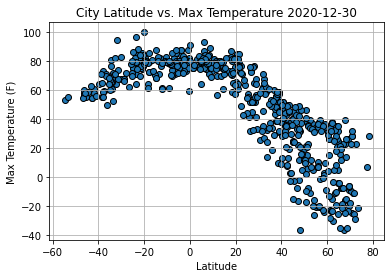

In [20]:
#set variable for current date to print 
today = date.today()

#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Max Temp"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.grid(b=True, which='major', linestyle='-')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {today}")

#save figure as png  
plt.savefig("Fig1.png", format='png')

plt.show()

This plot shows the correlation between the max temperature of cities around the world and their latitudinal location.  With 0 on the x-axis being the equator, this plot shows that the maximum temperture at locations around the equator are the warmest, and that there is a moderate negative correlation between latitude and temperature. 

## Latitude vs. Humidity Plot

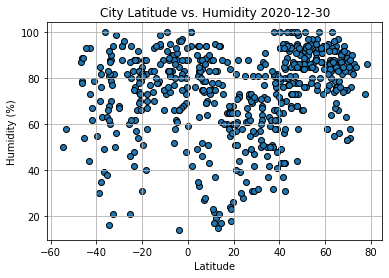

In [21]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Humidity"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.grid(b=True, which='major', linestyle='-')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {today}")

#save figure as png  
plt.savefig("Fig2.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of the city and their humidity level for the current day. Generally, it appears to show no real correlation between location and humidity levels.  

## Latitude vs. Cloudiness Plot

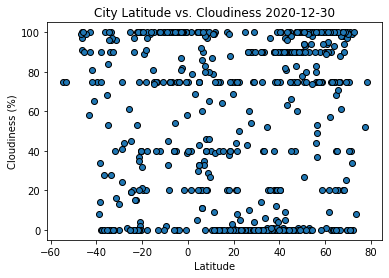

In [22]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Cloudiness"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {today}")

#save figure as png  
plt.savefig("Fig3.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of a city and the cloudiness level for the current day.  Generally, it appears to show no real correlation beteen latitude and cloudiness levels. 

## Latitude vs. Wind Speed Plot

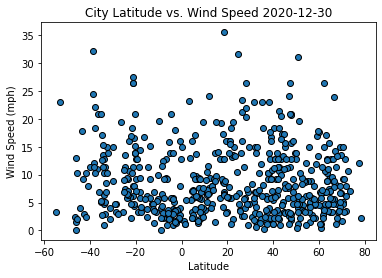

In [23]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Wind Speed"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {today}")

#save figure as png  
plt.savefig("Fig4.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of a city and their current wind speed.  Generally, there appears to be no real correlation between location and wind speed. 

## Linear Regression

In [27]:
north = city_weather.loc[city_weather["Lat"] >= 0]
south = city_weather.loc[city_weather["Lat"] < 0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Poya,-21.35,165.15,79.54,80,100,6.26,NC,1609358718
5,Ushuaia,-54.80,-68.30,53.60,50,75,3.36,AR,1609358461
6,Mataura,-46.19,168.86,58.44,79,97,1.43,NZ,1609358529
8,Mar del Plata,-38.00,-57.56,73.40,35,0,18.34,AR,1609358350
9,Avarua,-21.21,-159.78,80.60,83,37,11.41,CK,1609358547
...,...,...,...,...,...,...,...,...,...
553,Yulara,-25.24,130.99,69.80,21,0,6.93,AU,1609359133
558,Tamandaré,-8.76,-35.10,79.84,76,33,11.59,BR,1609359413
560,Burnie,-41.07,145.92,56.14,79,65,7.99,AU,1609359416
564,Aripuanã,-9.17,-60.63,80.64,92,100,2.15,BR,1609359421


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.845951493728686


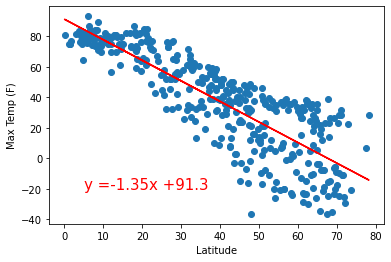

In [39]:
x = north["Lat"]
y = north["Max Temp"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(5, -20), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6206403602145967


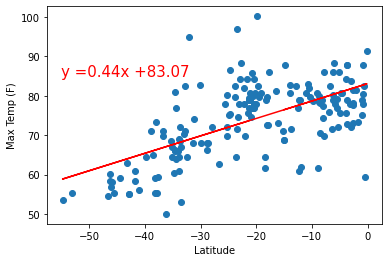

In [46]:
x = south["Lat"]
y = south["Max Temp"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 85), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3696770639688909


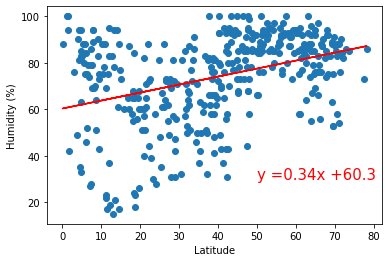

In [48]:
x = north["Lat"]
y = north["Humidity"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(50, 30), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19030743299916011


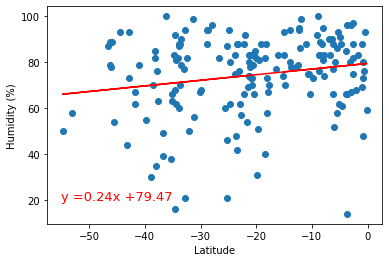

In [53]:
x = south["Lat"]
y = south["Humidity"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 20), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2042666661909172


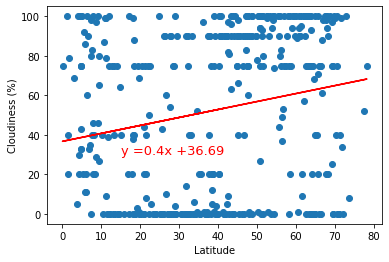

In [56]:
x = north["Lat"]
y = north["Cloudiness"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(15, 30), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15231639778272665


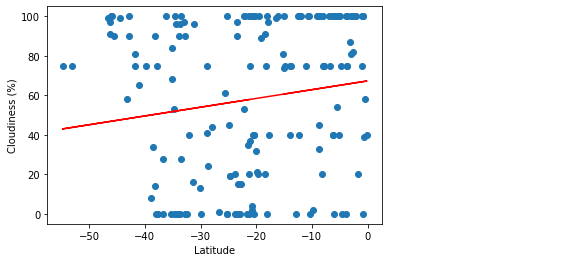

In [57]:
x = south["Lat"]
y = south["Cloudiness"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 30), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


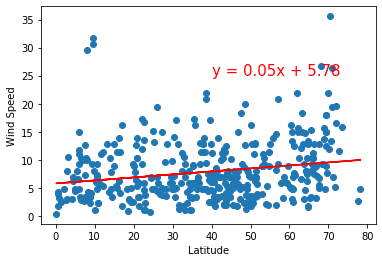

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


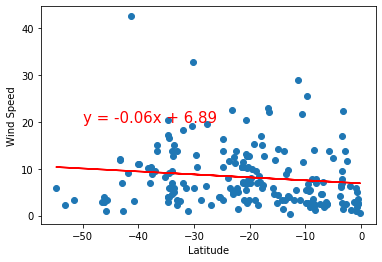